In [3]:
"""
@Project: Connexin Group 

@FileName: normalize_income_zipcode

@Author：Zhejian Peng

@Create date: Feb. 8th, 2018

@description：Normalized income according to zipcode. 

@Update date：  

@Vindicator： xx@ic.net.cn  

"""  

'\n@Project: Connexin Group \n\n@FileName: normalize_income_zipcode\n\n@Author：Zhejian Peng\n\n@Create date: Feb. 8th, 2018\n\n@description：Normalized income according to zipcode. \n\n@Update date：  \n\n@Vindicator： xx@ic.net.cn  \n\n'

In [4]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
#from termcolor import colored
from numbers import Number
from scipy import stats
from pandas import plotting

In [5]:
# read in load data
df = pd.read_csv("LoanStats_2017Q3.csv", low_memory=False)
loan_data = pd.read_csv("LoanStats_2017Q3.csv", low_memory=False)

In [6]:
# 我写了一堆code 然后发现其实简单一点就能弄出来，所以大家忽略后面的code！！！
# I have wrote a lot of code for this only to find out that I only need this simple function!!!
def norm_inc_by_zip(zipcode, income):
    '''
        @description: Use on a column of data; output a dictionary that returns mean and average in each zipcode area
        @zipcode： zipcode dataframe column
        @income: income df column 
        @return:      return a dictionary
    '''  
    # I try to replace nan with 0 for income, and nan in zipcode for "000xx"
    df["annual_inc"].fillna(0)
    df["zip_code"].fillna("000xx")
    
    mean_var = {}
    for idx, value in zipcode.iteritems():
        # calculate total income
        if value in mean_var:
            mean_var[value].append(income[idx])
        else:
            mean_var[value] = [income[idx]]

    
    #assert(len(zip_code) == len(mean_var))
    # compute the average income in each zip_code area
    for key, value in mean_var.items():
        # if there only one element, we set their variance to 1. This way when normalize, it will have a 0 z-score.
        if len(value) == 1:
            #print(value[0])
            mean_var[key] = [value[0], 1]
        else:
            mean_var[key] = [np.mean(value), np.std(value)]
        
    # first loop through every annual income by calculate its z score. (Income - mean_by_zipcode) / variance_by_zipcode
    for idx, value in df["zip_code"].iteritems():
        #inc_colnum = df.columns.get_loc("annual_inc")
        col_num_inc = df["annual_inc"]
        mean, std = mean_var[value]
        df.at[idx, "annual_inc"] = (df.at[idx, "annual_inc"] - mean) / std
    print("Income is successfually normalized")
    return mean_var

In [7]:
dic = norm_inc_by_zip(df["zip_code"], df["annual_inc"])


Income is successfually normalized


In [8]:
# Now I want to check if this normalized distribution is in fact mean = 0, var = 1
def mean_var(zipcode, income):
    '''
        @description: Use on a column of data; output a dictionary that returns mean and average in each zipcode area
        @zipcode： zipcode dataframe column
        @income: income df column 
        @return:      return a dictionary
    '''  
    income.fillna(0)
    zipcode.fillna("000xx")
    
    total = {}
    for idx, value in zipcode.iteritems():
        # calculate total income
        if value in total:
            total[value].append(income[idx])
        else:
            total[value] = [income[idx]]

    
    #assert(len(zip_code) == len(total))
    # compute the average income in each zip_code area

    for key, value in total.items():
        # if there only one element, we set their variance to 1. This way when normalize, it will have a 0 z-score.
        if len(value) == 1:
            #print(value[0])
            total[key] = [value[0], 1]
        else:
            total[key] = [np.mean(value), np.std(value)]
        
    return total

In [9]:
m_v = mean_var(df["zip_code"], df["annual_inc"])

In [10]:
m_v

{'750xx': [-1.295403746343084e-16, 0.99999999999999989],
 '778xx': [2.581914010756178e-17, 0.99999999999999989],
 '923xx': [3.3978355913794828e-17, 1.0],
 '604xx': [-1.7881207919790601e-16, 0.99999999999999989],
 '080xx': [-7.6250611548182453e-17, 1.0],
 '223xx': [7.9390249805597789e-17, 1.0],
 '700xx': [-1.5503114307828762e-16, 0.99999999999999989],
 '308xx': [-2.483393607714166e-17, 1.0],
 '462xx': [1.1229842088162504e-16, 1.0],
 '945xx': [1.229893012330622e-16, 0.99999999999999989],
 '912xx': [5.1241062675007228e-17, 0.99999999999999989],
 '917xx': [2.4734082573927537e-17, 0.99999999999999989],
 '303xx': [-5.9623088359499153e-17, 1.0],
 '544xx': [8.2488533138037335e-17, 1.0],
 '210xx': [5.0898476773646148e-17, 1.0],
 '111xx': [-1.0573552615477681e-16, 1.0000000000000002],
 '201xx': [-4.0531951692664443e-17, 1.0],
 '275xx': [-1.6485910342461721e-16, 0.99999999999999989],
 '484xx': [1.8331589476368864e-16, 1.0],
 '481xx': [-9.6358979495768307e-17, 1.0],
 '300xx': [-7.1435261638079776e

In [11]:
# We can see after normalization the data appears to be mean = 0, std = 1, so our normalization is good.

# Since we know that our functions works fine, lets import the complete data, and call abouve functions

In [12]:
LARGE_FILE = "loan_data_seperate_current.csv"
CHUNKSIZE = 100000 # processing 100,000 rows at a time
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frames = []

In [13]:
for df in reader:
    norm_inc_by_zip(zipcode=df["zip_code"], income=df["annual_inc"])
    frames.append(df)

Income is successfually normalized
Income is successfually normalized
Income is successfually normalized
Income is successfually normalized
Income is successfually normalized
Income is successfually normalized
Income is successfually normalized
Income is successfually normalized


/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


Income is successfually normalized


In [14]:
#  combine normalized data and output it to a file
normalized_income_loan_data = pd.concat(frames)

In [15]:
# For normalized data, study income distribution vs zipcode
# classif zip_codes
def classify_zipcode(column):
    '''
        @description: Use on a column of data; output a dictionary that stores every keys in column and count the number
                      of times this key appear in this column; 
        @dictionary： takes a pandas dataframe column as input
        @... 
        @return:      return a dictionary counting the number of elements in the column
    '''  
    dic = {}
    for i in column:
        if i in dic:
            dic[i] +=1
        else:
            dic[i] = 1
    return dic


In [16]:
zipcode = classify_zipcode(normalized_income_loan_data["zip_code"])

In [17]:
len(zipcode)

933

In [18]:
counter = 0 
for key, value in zipcode.items():
    if value >= 30:
        counter +=1
print(counter)

851


/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


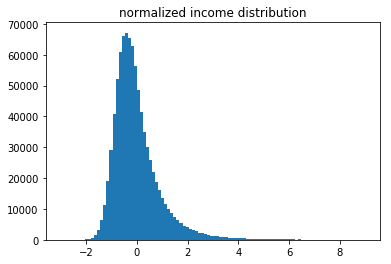

In [26]:
y = normalized_income_loan_data["annual_inc"]
plt.hist(y, bins=100, range=(-3,9))
plt.title("normalized income distribution")

In [20]:
CHUNKSIZE = 100000 # processing 100,000 rows at a time
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frames = []
for df in reader:
    frames.append(df)
unnormalized_income = pd.concat(frames)

/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


Text(0.5,1,'unnormalized income distribution')

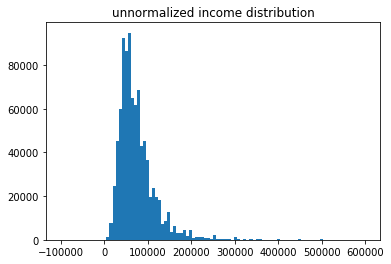

In [21]:
plt.hist(unnormalized_income["annual_inc"], bins=100, range=(-100000, 600000))
plt.title("unnormalized income distribution")

In [22]:
# conditional distribution: income distribution according to loan_status:
# organize income mapped to each loan_status, using normalized income
loan_status = {}
# set normalize_income_loan_data na value to 0. Which means use average income to replace n/a value.
normalized_income_loan_data["annual_inc"].fillna(0)
for idx, i in normalized_income_loan_data["loan_status"].iteritems():
    if i in loan_status:
        loan_status[i].append(normalized_income_loan_data["annual_inc"][idx])
    else:
        loan_status[i] = [normalized_income_loan_data["annual_inc"][idx]]
assert(len(loan_status) == 9)
#loan_status

In [39]:
# plot 9 income distribution graph according to each loan_status
def plot_inc_distribution(key, loan_status, data = "normalized"):
    plt.hist(loan_status[key], bins=100, range=(-3,9))
    title = data + " " + key + " income distribution"
    plt.title(title)
    plt.show()

/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/zhejianpeng/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


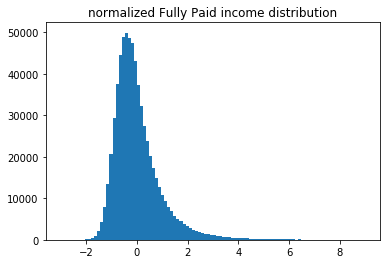

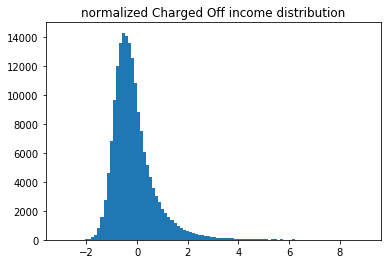

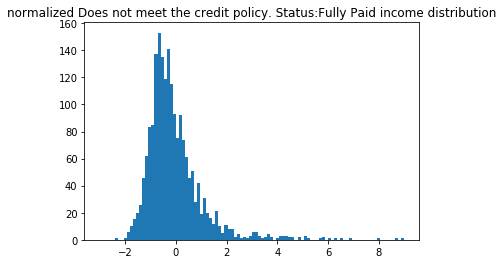

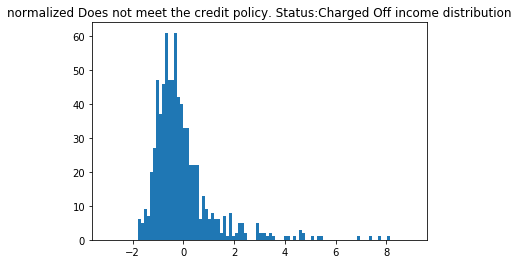

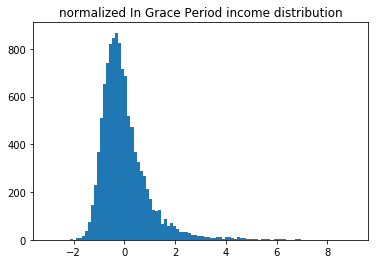

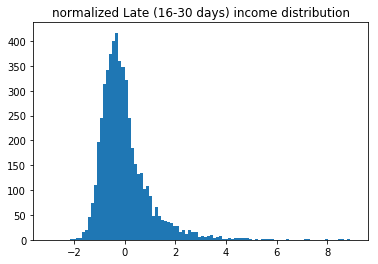

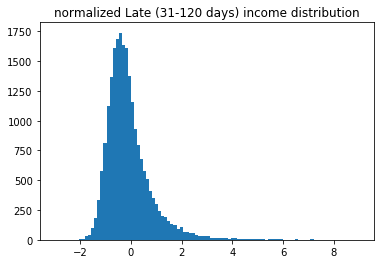

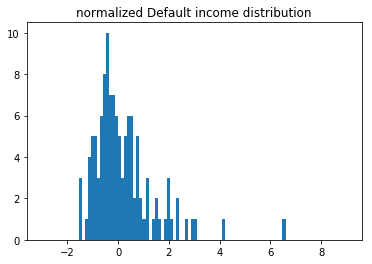

In [40]:
for key in loan_status:
    if isinstance(key, str):
        plot_inc_distribution(key, loan_status=loan_status)


In [32]:
# conditional distribution: income distribution according to loan_status:
# organize income mapped to each loan_status, using normalized income
unnormalized_loan_status = {}
# set normalize_income_loan_data na value to 0. Which means use average income to replace n/a value.
unnormalized_income["annual_inc"].fillna(0, inplace = True)
for idx, i in unnormalized_income["loan_status"].iteritems():
    if i in unnormalized_loan_status:
        unnormalized_loan_status[i].append(unnormalized_income["annual_inc"][idx])
    else:
        unnormalized_loan_status[i] = [unnormalized_income["annual_inc"][idx]]
assert(len(unnormalized_loan_status) == 9)
#loan_status

In [53]:
def plot_inc_distribution(key, data, data_type = "normalized"):
    if data_type == "normalized":
        plt.hist(data[key], bins=100, range=(-3,9))
        title = data_type + " " + key + " income distribution"
        plt.title(title)
        plt.show()
    elif data_type == "unnormalized":
        plt.hist(data[key], bins=100, range=(0,300000))
        title = data_type + " " + key + " income distribution"
        plt.title(title)
        plt.show()

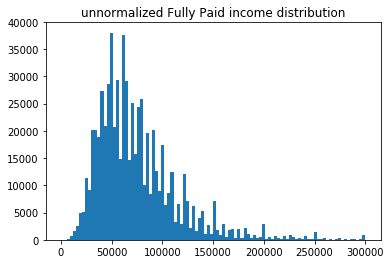

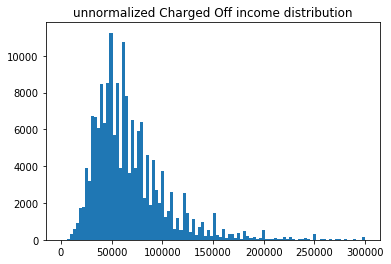

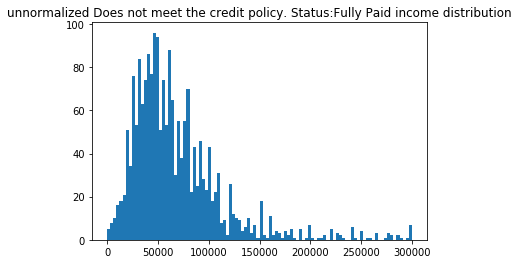

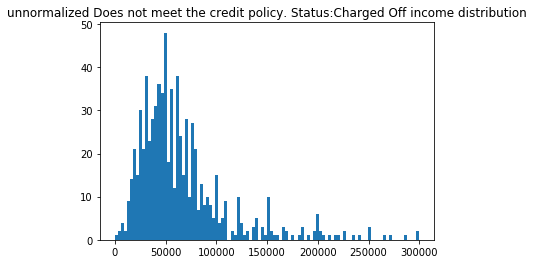

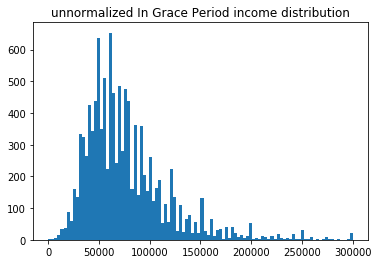

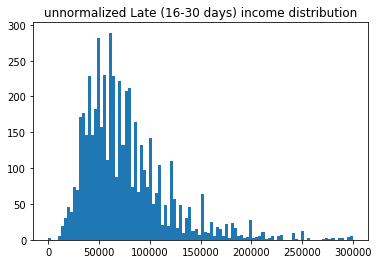

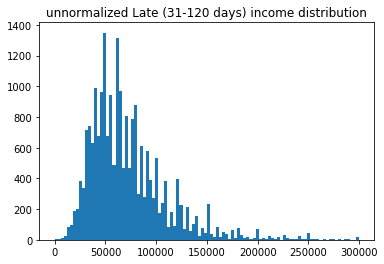

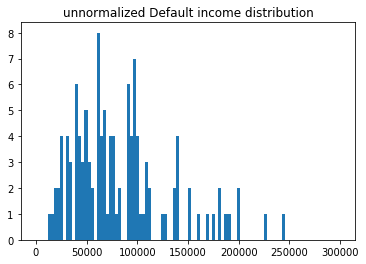

In [54]:
for key in unnormalized_loan_status:
    if isinstance(key, str):
        plot_inc_distribution(key, unnormalized_loan_status, data_type= "unnormalized")



# Compute the mean and variance in unnormalized income data given loan_status

In [61]:
for key, value in unnormalized_loan_status.items():
    print(key, np.mean(value), np.var(value)**0.5)

Fully Paid 76843.4625921 64733.3412046
Charged Off 69355.033304 64795.3878591
nan 0.0 0.0
Does not meet the credit policy. Status:Fully Paid 72000.2564638 71076.8470428
Does not meet the credit policy. Status:Charged Off 69525.9150329 62086.6401537
In Grace Period 79011.6726971 57834.488265
Late (16-30 days) 78362.7771736 68062.0295061
Late (31-120 days) 74325.3338909 82854.2211218
Default 85228.5882353 55889.7113723


# irrelevant Code After, You don't need to read !

In [117]:
# Estimate how many different output in Data sets
zip_code = classify_zipcode(df["zip_code"])
print("There are ", len(zip_code) , " different number of zipcode in the dataset")

There are  858  different number of zipcode in the dataset


In [118]:
# Calculate total income in each zip_code area
def total_income(zipcode, income):
    '''
        @description: Use on a column of data; output a dictionary that stores the total amound of income in each zipcode
        @zipcode： zipcode dataframe column
        @income: income df column 
        @return:      return a dictionary
    '''  
    total = {}
    for idx, value in zipcode.iteritems():
        if value in total:
            total[value] += income[idx]
        else:
            total[value] = 0
    return total




In [119]:
total_inc = total_income(df["zip_code"], df["annual_inc"])
total_inc

{'750xx': 117777887.78999999,
 '778xx': 6003665.0,
 '923xx': 40460530.760000005,
 '604xx': 60776579.850000001,
 '080xx': 52022118.220000006,
 '223xx': 16356666.0,
 '700xx': 14968997.0,
 '308xx': 6043429.0,
 '462xx': 22594143.52,
 '945xx': 120327971.85000001,
 '912xx': 8546453.0,
 '917xx': 61733465.75,
 '303xx': 41897933.359999999,
 '544xx': 5948024.5,
 '210xx': 29579133.079999998,
 '111xx': 14966745.0,
 '201xx': 54630777.789999999,
 '275xx': 35945775.729999997,
 '484xx': 11248167.6,
 '481xx': 48042598.719999999,
 '300xx': 96050041.960000008,
 '019xx': 16681060.24,
 '799xx': 15815999.939999999,
 '773xx': 51279291.0,
 '386xx': 12461131.310000001,
 '322xx': 26427815.079999998,
 '882xx': 5383552.7599999998,
 '212xx': 37686999.799999997,
 '112xx': 105099123.95999999,
 '060xx': 30100305.800000001,
 '104xx': 63301784.420000002,
 '600xx': 61496555.919999994,
 '751xx': 30988040.440000001,
 '853xx': 49178003.089999996,
 '959xx': 13047770.24,
 '972xx': 23723387.0,
 '983xx': 20443028.0,
 '106xx': 

In [122]:
# Check len(total_income) == len(zip_code)
print(len(total_inc) == len(zip_code))

True


In [127]:
def ave_income(zipcode, income):
    '''
        @description: Use on a column of data; output a dictionary that returns the average annual income in 
                      each zipcode. If income is nan, replace it with 0.
        @zipcode： zipcode dataframe column
        @income: income df column 
        @return:      return a dictionary
    '''  
    income.fillna(0)
    zipcode.fillna("000xx")
    
    total = {}
    zip_code = {}
    ave_income = {}

    for idx, value in zipcode.iteritems():
        # calculate total income
        if value in total:
            total[value] += income[idx]
        else:
            total[value] = 0
        # count the number of borrowers in each zipcode
        if value in zip_code:
            zip_code[value] += 1
        else:
            zip_code[value] = 1
    
    assert(len(zip_code) == len(total))
    # compute the average income in each zip_code area
    for key, value in zip_code.items():
        ave_income[key] = total[key] / float(value)
    assert(len(total) == len(ave_income))
    return ave_income
    


In [132]:
ave = ave_income(df["zip_code"].fillna("000xx"), df["annual_inc"].fillna(0))


{'000xx': 0.0,
 '010xx': 72898.664948453603,
 '011xx': 63834.546428571433,
 '012xx': 64490.5,
 '013xx': 69735.991999999998,
 '014xx': 73804.183673469393,
 '015xx': 81637.059466019418,
 '016xx': 81094.266666666663,
 '017xx': 91355.047083333338,
 '018xx': 75722.807947019872,
 '019xx': 87795.053894736848,
 '020xx': 97744.017857142855,
 '021xx': 79061.279358974367,
 '022xx': 83550.0,
 '023xx': 79902.052879999988,
 '024xx': 113757.56382978724,
 '025xx': 88412.441860465115,
 '026xx': 74625.959459459453,
 '027xx': 74463.701067615664,
 '028xx': 79751.967359050439,
 '029xx': 69649.174339622637,
 '030xx': 90241.477884615379,
 '031xx': 77302.283783783787,
 '032xx': 81029.604938271601,
 '033xx': 87197.71428571429,
 '034xx': 83497.534883720931,
 '035xx': 49910.0,
 '036xx': 39750.0,
 '037xx': 241605.78260869565,
 '038xx': 77493.923976608188,
 '039xx': 70639.0,
 '040xx': 75829.388148148151,
 '041xx': 62754.838709677417,
 '042xx': 57668.349999999999,
 '043xx': 73092.320000000007,
 '044xx': 58461.94000

In [130]:
# Now we need variance to compute normalized annual income.

In [142]:
var_income = np.array(df["annual_inc"].fillna(0))

In [146]:
np.var(var_income)

103673891269.58424

In [52]:
ave_inc = {}
for key, value in zip_code.items():
    ave_inc[key] = total_income[key] / float(value)

In [70]:
for i in df["annual_inc"]:
    if math.isnan(i):
        print(i)

nan
nan


In [172]:
def norm_inc_by_zip(zipcode, income):
    '''
        @description: Use on a column of data; output a dictionary that returns mean and average in each zipcode area
        @zipcode： zipcode dataframe column
        @income: income df column 
        @return:      return a dictionary
    '''  
#    income.fillna(0)
#    zipcode.fillna("000xx")
    
    total = {}
    for idx, value in zipcode.iteritems():
        # calculate total income
        if value in total:
            total[value].append(income[idx])
        else:
            total[value] = [income[idx]]

    
    assert(len(zip_code) == len(total))
    # compute the average income in each zip_code area
    return total

In [192]:
dic = norm_inc_by_zip(df["zip_code"].fillna("000xx"), df["annual_inc"].fillna(0))

In [194]:
dic_a = {}
for key, value in dic.items():
    dic_a[key] = [np.mean(value), np.std(value)]

In [195]:
dic_a

{'000xx': [0.0, 0.0],
 '010xx': [73872.891752577314, 41407.478855624671],
 '011xx': [64691.689285714288, 24945.820503555289],
 '012xx': [65174.710526315786, 26767.059261739381],
 '013xx': [72485.991999999998, 35034.145392419894],
 '014xx': [73896.020408163269, 47128.029659116924],
 '015xx': [81952.593446601939, 48230.428704865953],
 '016xx': [81260.933333333334, 48406.440061398629],
 '017xx': [92313.380416666681, 51125.672687697355],
 '018xx': [76053.933774834441, 45569.334355952808],
 '019xx': [88110.843368421047, 58357.069687825009],
 '020xx': [98101.16071428571, 75331.924449978484],
 '021xx': [79163.843461538461, 47312.336722926251],
 '022xx': [108550.0, 55919.786301451473],
 '023xx': [80262.052879999988, 47865.963107602438],
 '024xx': [117268.20212765958, 113392.37044755023],
 '025xx': [89505.465116279069, 67087.278334582981],
 '026xx': [75369.202702702707, 37112.110727835563],
 '027xx': [74677.224199288263, 41825.751077522145],
 '028xx': [80048.703264094962, 53936.920417297268],
 